In [303]:
import numpy as np
import plotly.express
from matplotlib.lines import lineStyles
from numpy import int32
import matplotlib.pyplot as plt
import sympy as sp
from scipy.optimize import fsolve
from sympy.printing.pretty.pretty_symbology import line_width
from numpy.polynomial.legendre import Legendre


In [304]:
def f(U_plus):
    kappa = 0.41
    B = 5.1
    Y_plus = U_plus + np.exp(-kappa * B) * (
                np.exp(kappa * U_plus) - 1 - kappa * U_plus - 1 / 2 * (kappa * U_plus) ** 2 - 1 / 6 * (
                    kappa * U_plus) ** 3 - 1 / 24 * ((kappa * U_plus) ** 4))
    return Y_plus

In [305]:
def from_y_get_U(subintervals=[1, 25, 100, 300, 590]):
    i = 0
    U_plus_solution = np.zeros(len(subintervals))
    for Y_plus in (subintervals):
        def equation(U_plus, Y_plus):
            return f(U_plus) - Y_plus
        initial_guess = Y_plus
        U_plus_solution[i] = fsolve(equation, initial_guess, args=(Y_plus))
        i += 1
    return  U_plus_solution

## (a)


C:\Users\David\AppData\Local\Temp\ipykernel_32200\279020459.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U_plus_solution[i] = fsolve(equation, initial_guess, args=(Y_plus))


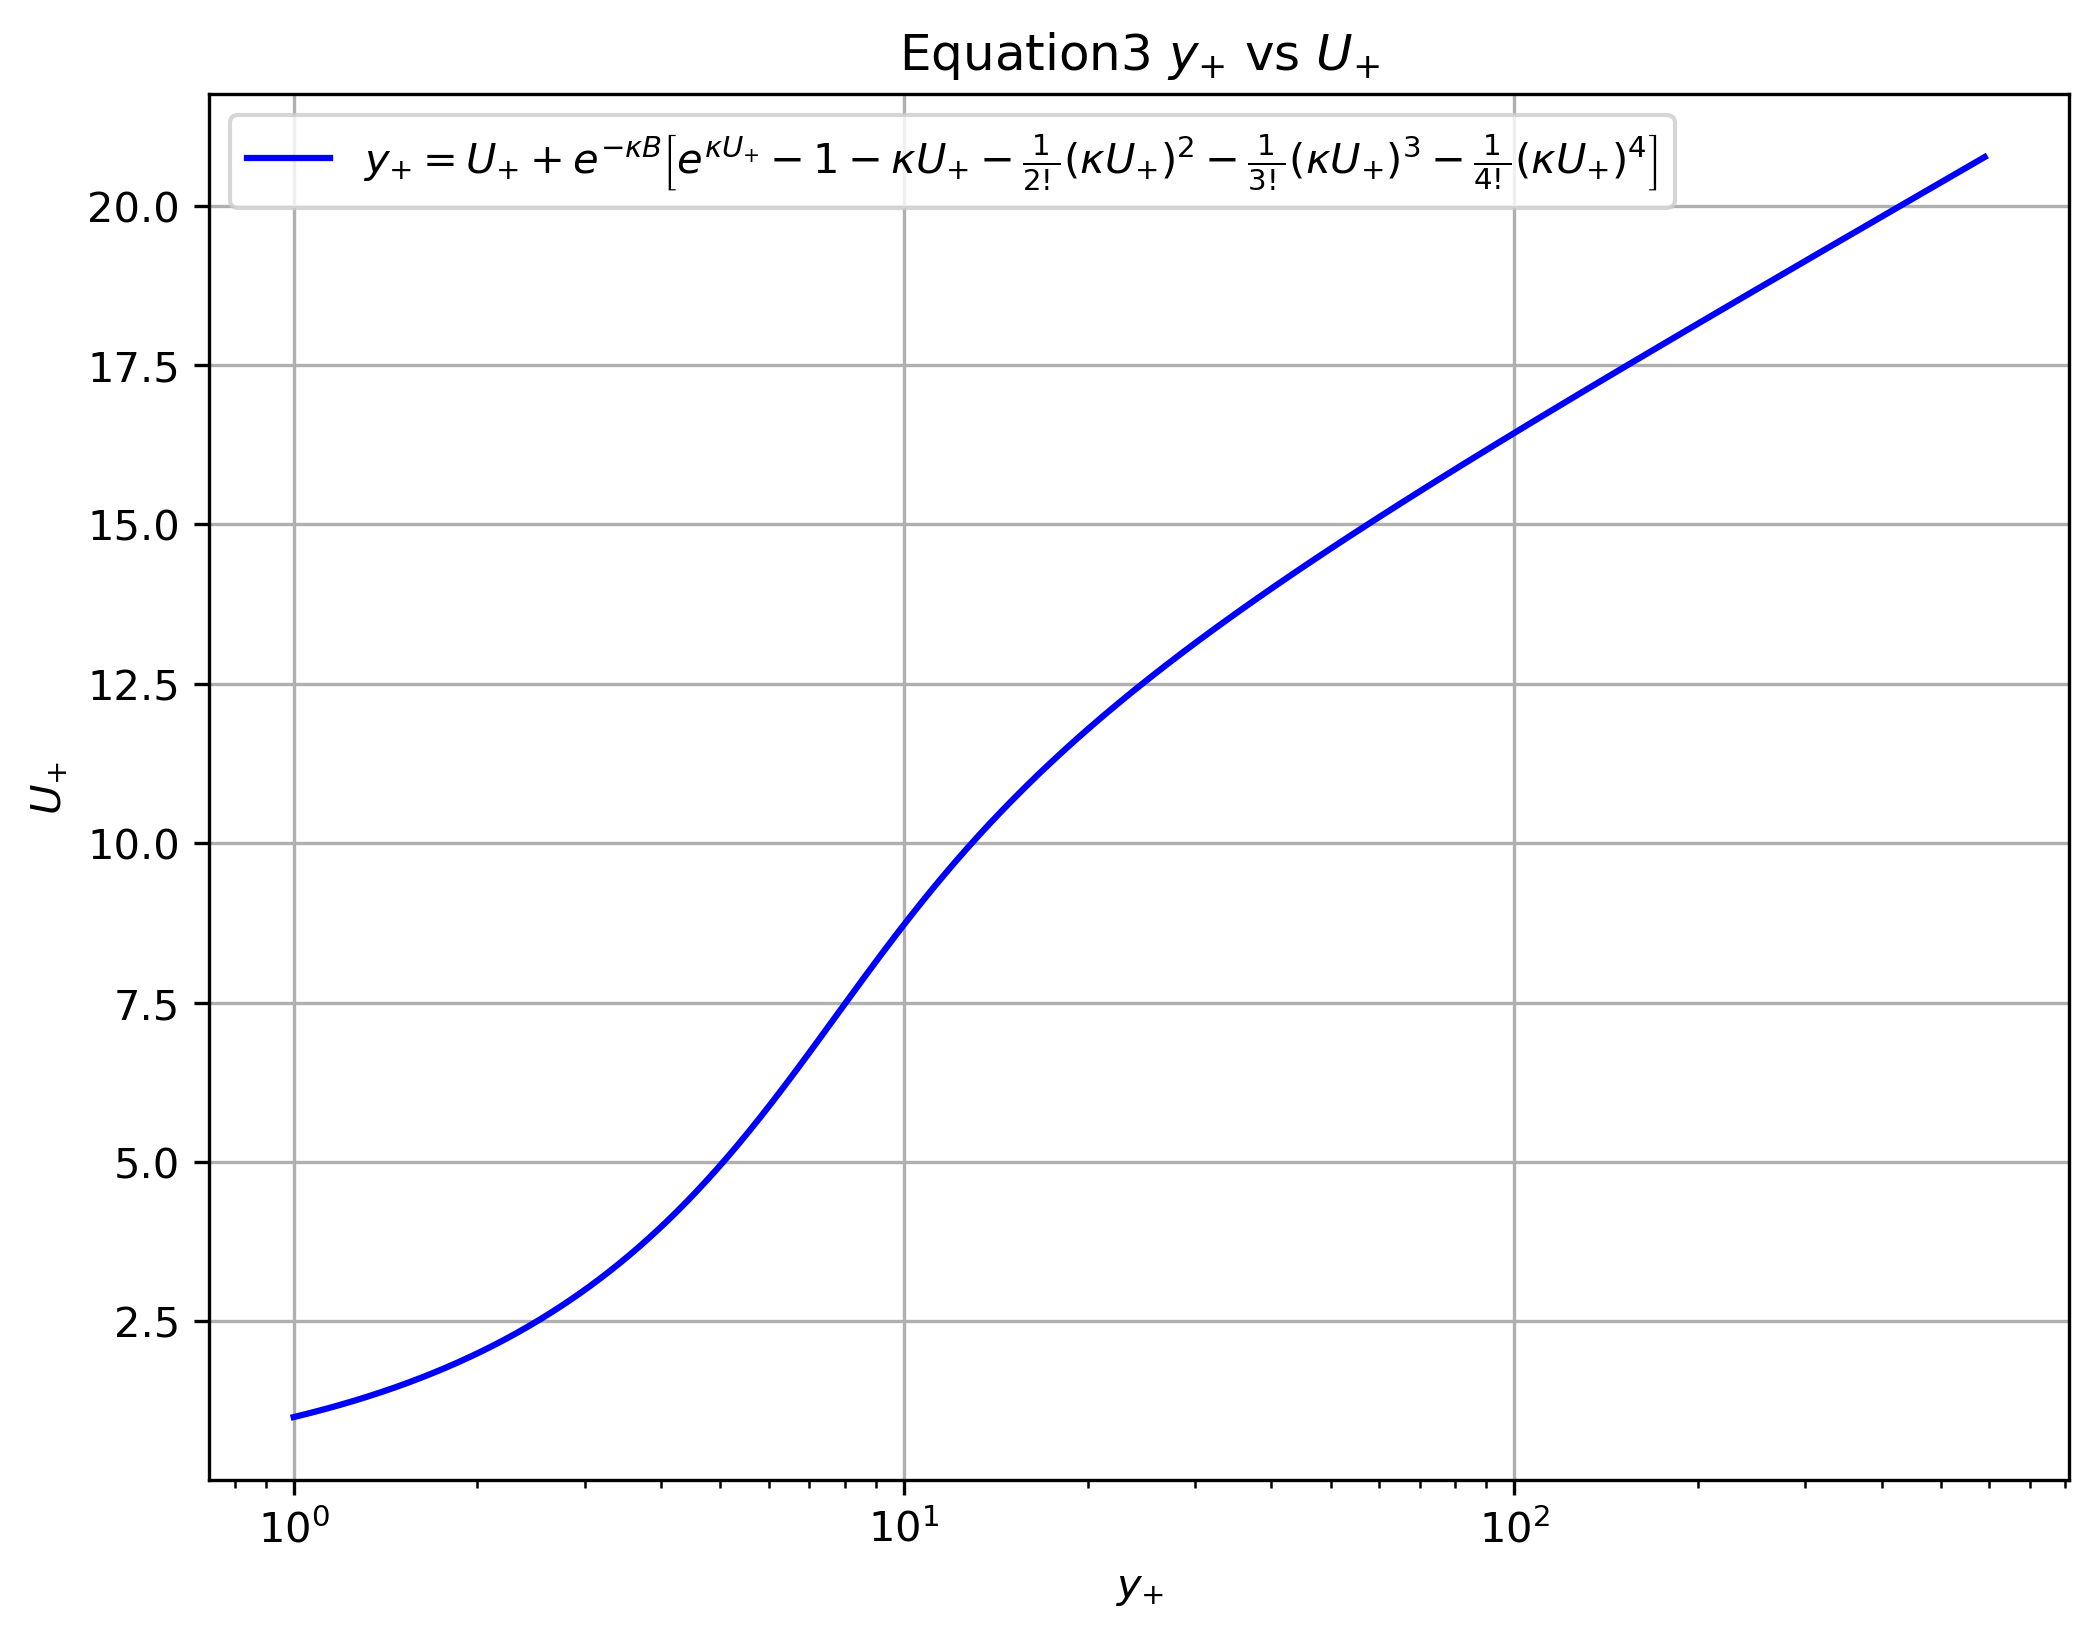

In [306]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define symbols
U_plus = sp.symbols('U_plus')

# Given constants
kappa = 0.41
B = 5.1

# Expression for y_plus
exp_term = sp.exp(kappa * U_plus) - 1 - kappa * U_plus - (1/2) * (kappa * U_plus)**2 - (1/6) * (kappa * U_plus)**3 - (1/24) * (kappa * U_plus)**4
y_plus_expr = U_plus + sp.exp(-kappa * B) * exp_term

# Convert the symbolic expression to a numerical function
y_plus_func = sp.lambdify(U_plus, y_plus_expr, 'numpy')

# Generate values for U_plus
U_plus_solution=from_y_get_U()
a=U_plus_solution[0]
b=U_plus_solution[4]
U_plus_vals=np.linspace(a,b,5900)
# Compute corresponding y_plus values
y_plus_vals = y_plus_func(U_plus_vals)
# Plot the function
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(y_plus_vals,U_plus_vals, label=r'$y_{+} = U_{+} + e^{-\kappa B} \left[e^{\kappa U_{+}} - 1 - \kappa U_{+} - \frac{1}{2!}(\kappa U_{+})^2 - \frac{1}{3!}(\kappa U_{+})^3 - \frac{1}{4!}(\kappa U_{+})^4 \right]$', color='blue')
plt.title(r'Equation3 $y_{+}$ vs $U_{+}$')
plt.xlabel(r'$y_{+}$')
plt.ylabel(r'$U_{+}$')
plt.grid(True)
plt.xscale('log')
plt.legend()
plt.show()

## (b)

In [307]:
picewise_x=U_plus_solution
picewise_y=f(U_plus_solution)

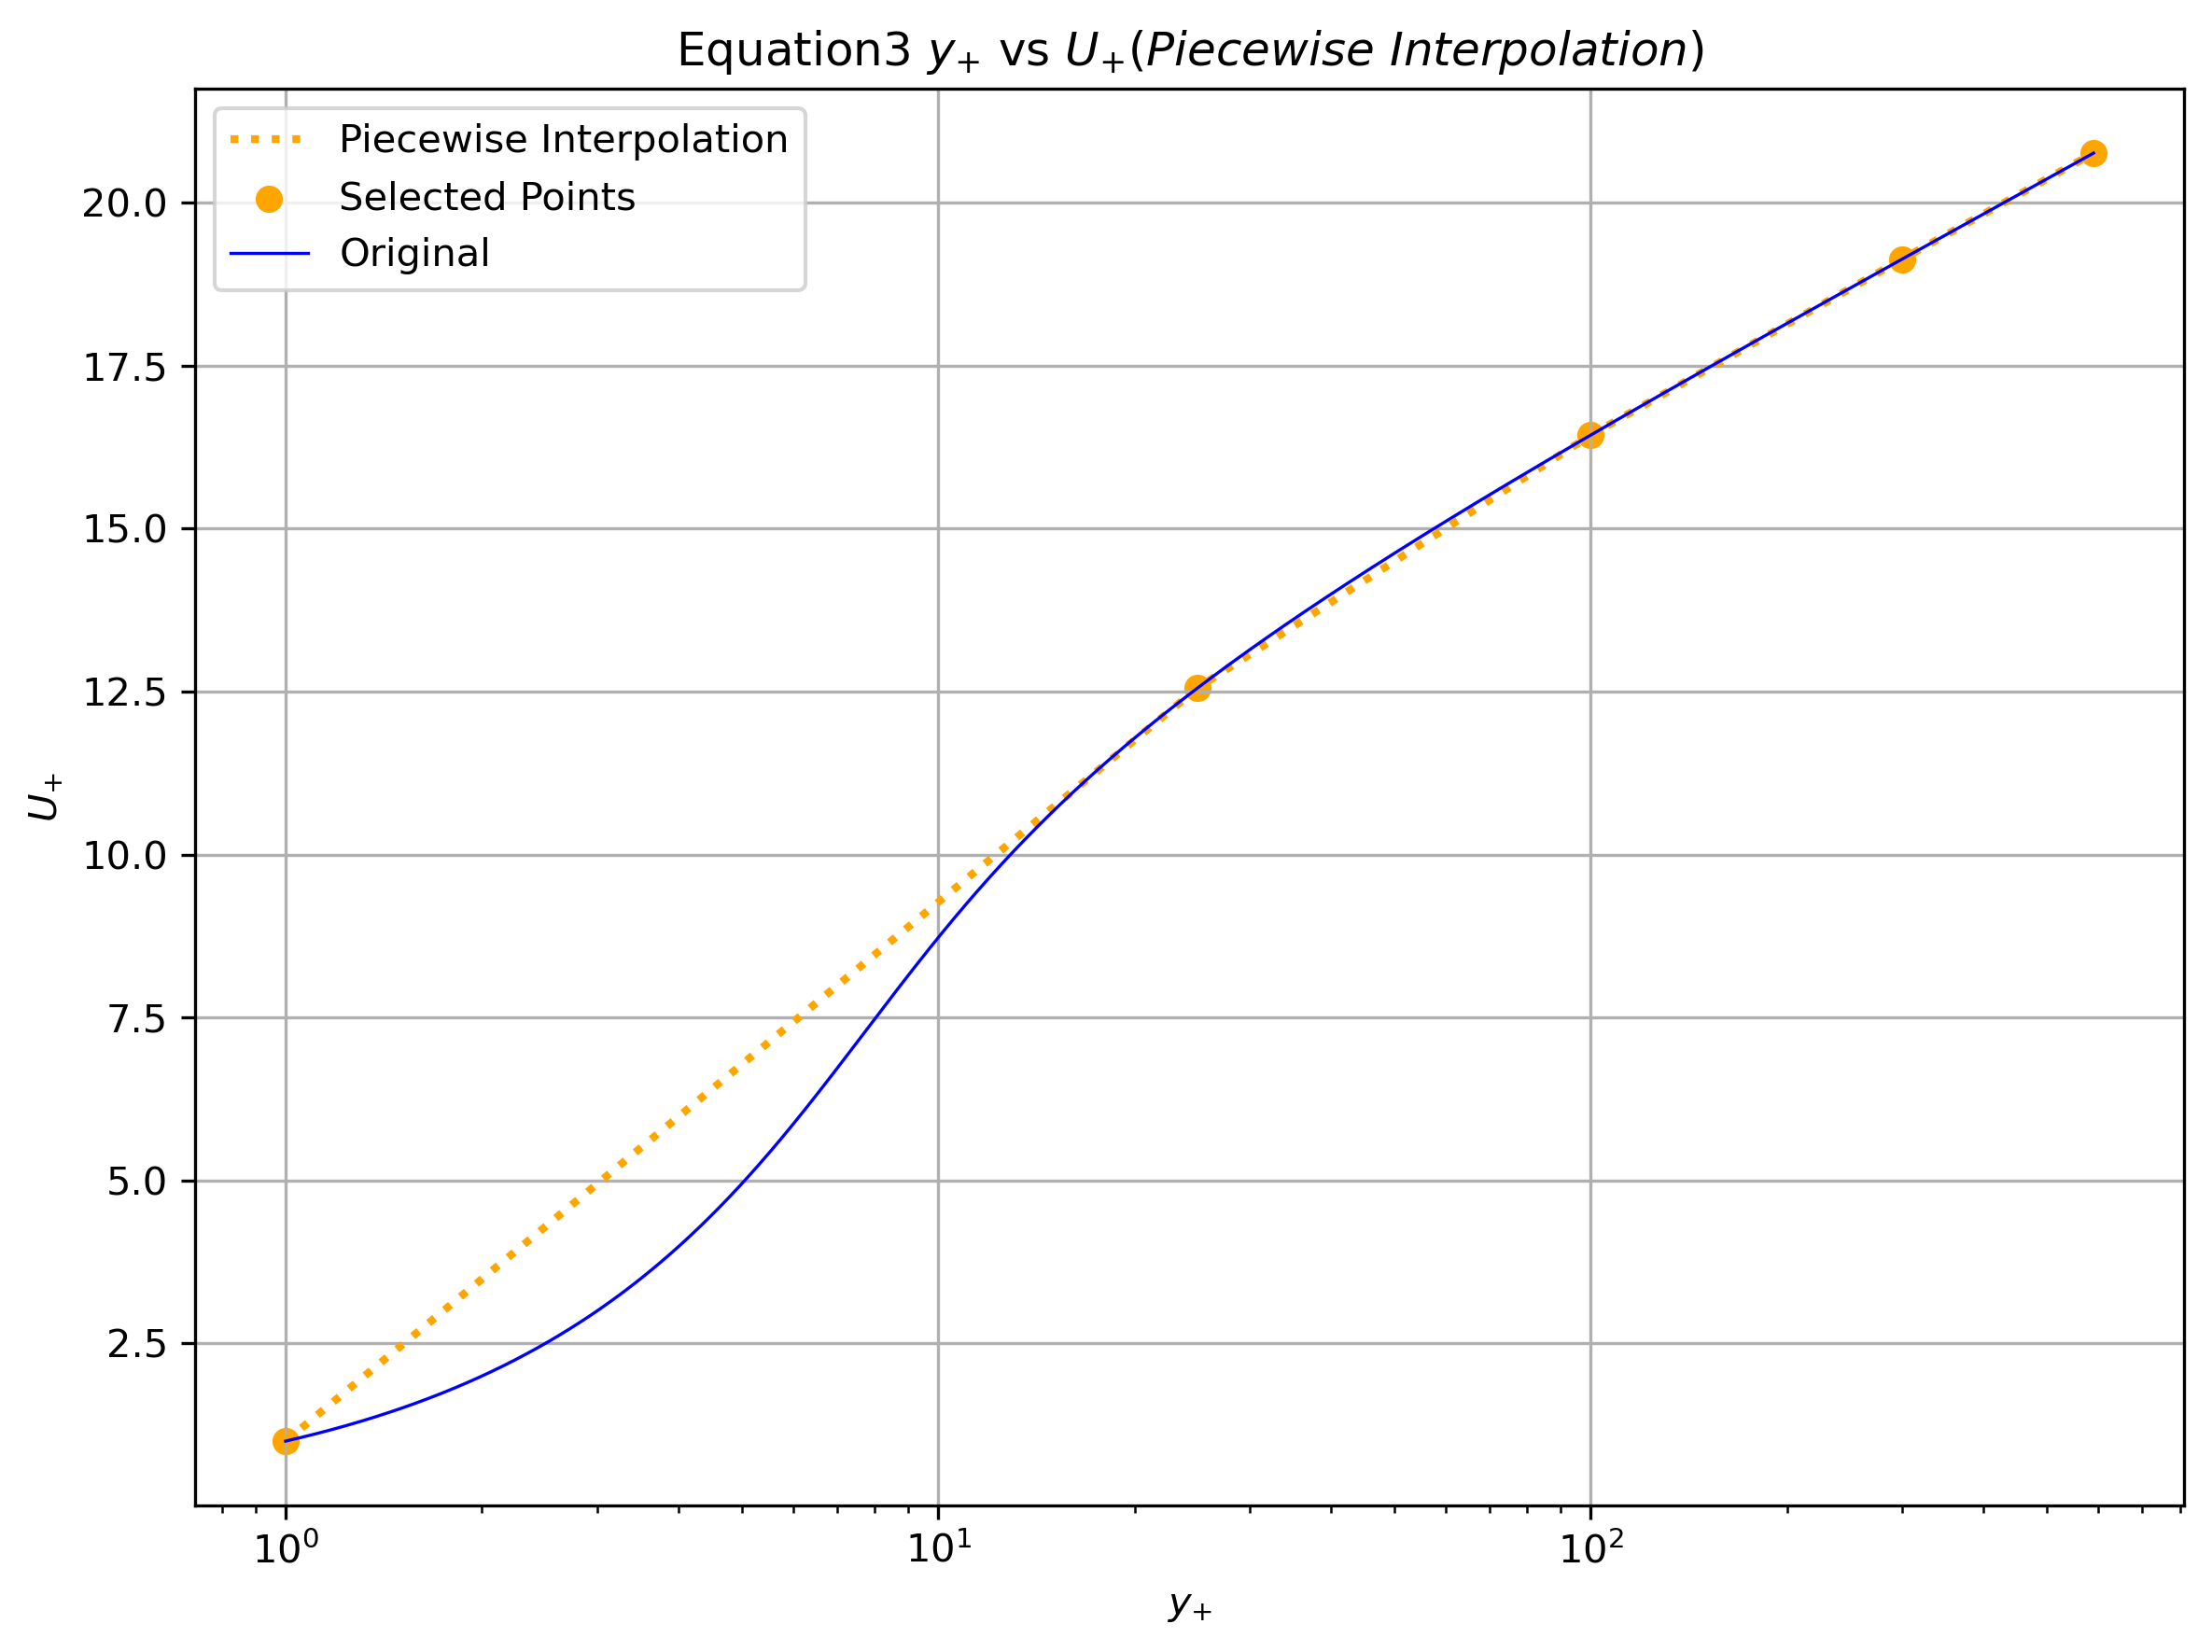

In [308]:
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(picewise_y,picewise_x,color="orange",linestyle=":",label=f'Piecewise Interpolation',linewidth=2)
plt.scatter(picewise_y,U_plus_solution,color="orange", label="Selected Points")
plt.title("Equation 3(Piecewise Interpolation)")
plt.plot(y_plus_vals,U_plus_vals, label=f'Original',color="blue",linewidth=0.8)
plt.legend()
plt.title(r'Equation3 $y_{+}$ vs $U_{+}(Piecewise \ Interpolation)$')
plt.xlabel(r'$y_{+}$')
plt.ylabel(r'$U_{+}$')
plt.xscale('log')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## (c)


C:\Users\David\AppData\Local\Temp\ipykernel_32200\279020459.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U_plus_solution[i] = fsolve(equation, initial_guess, args=(Y_plus))


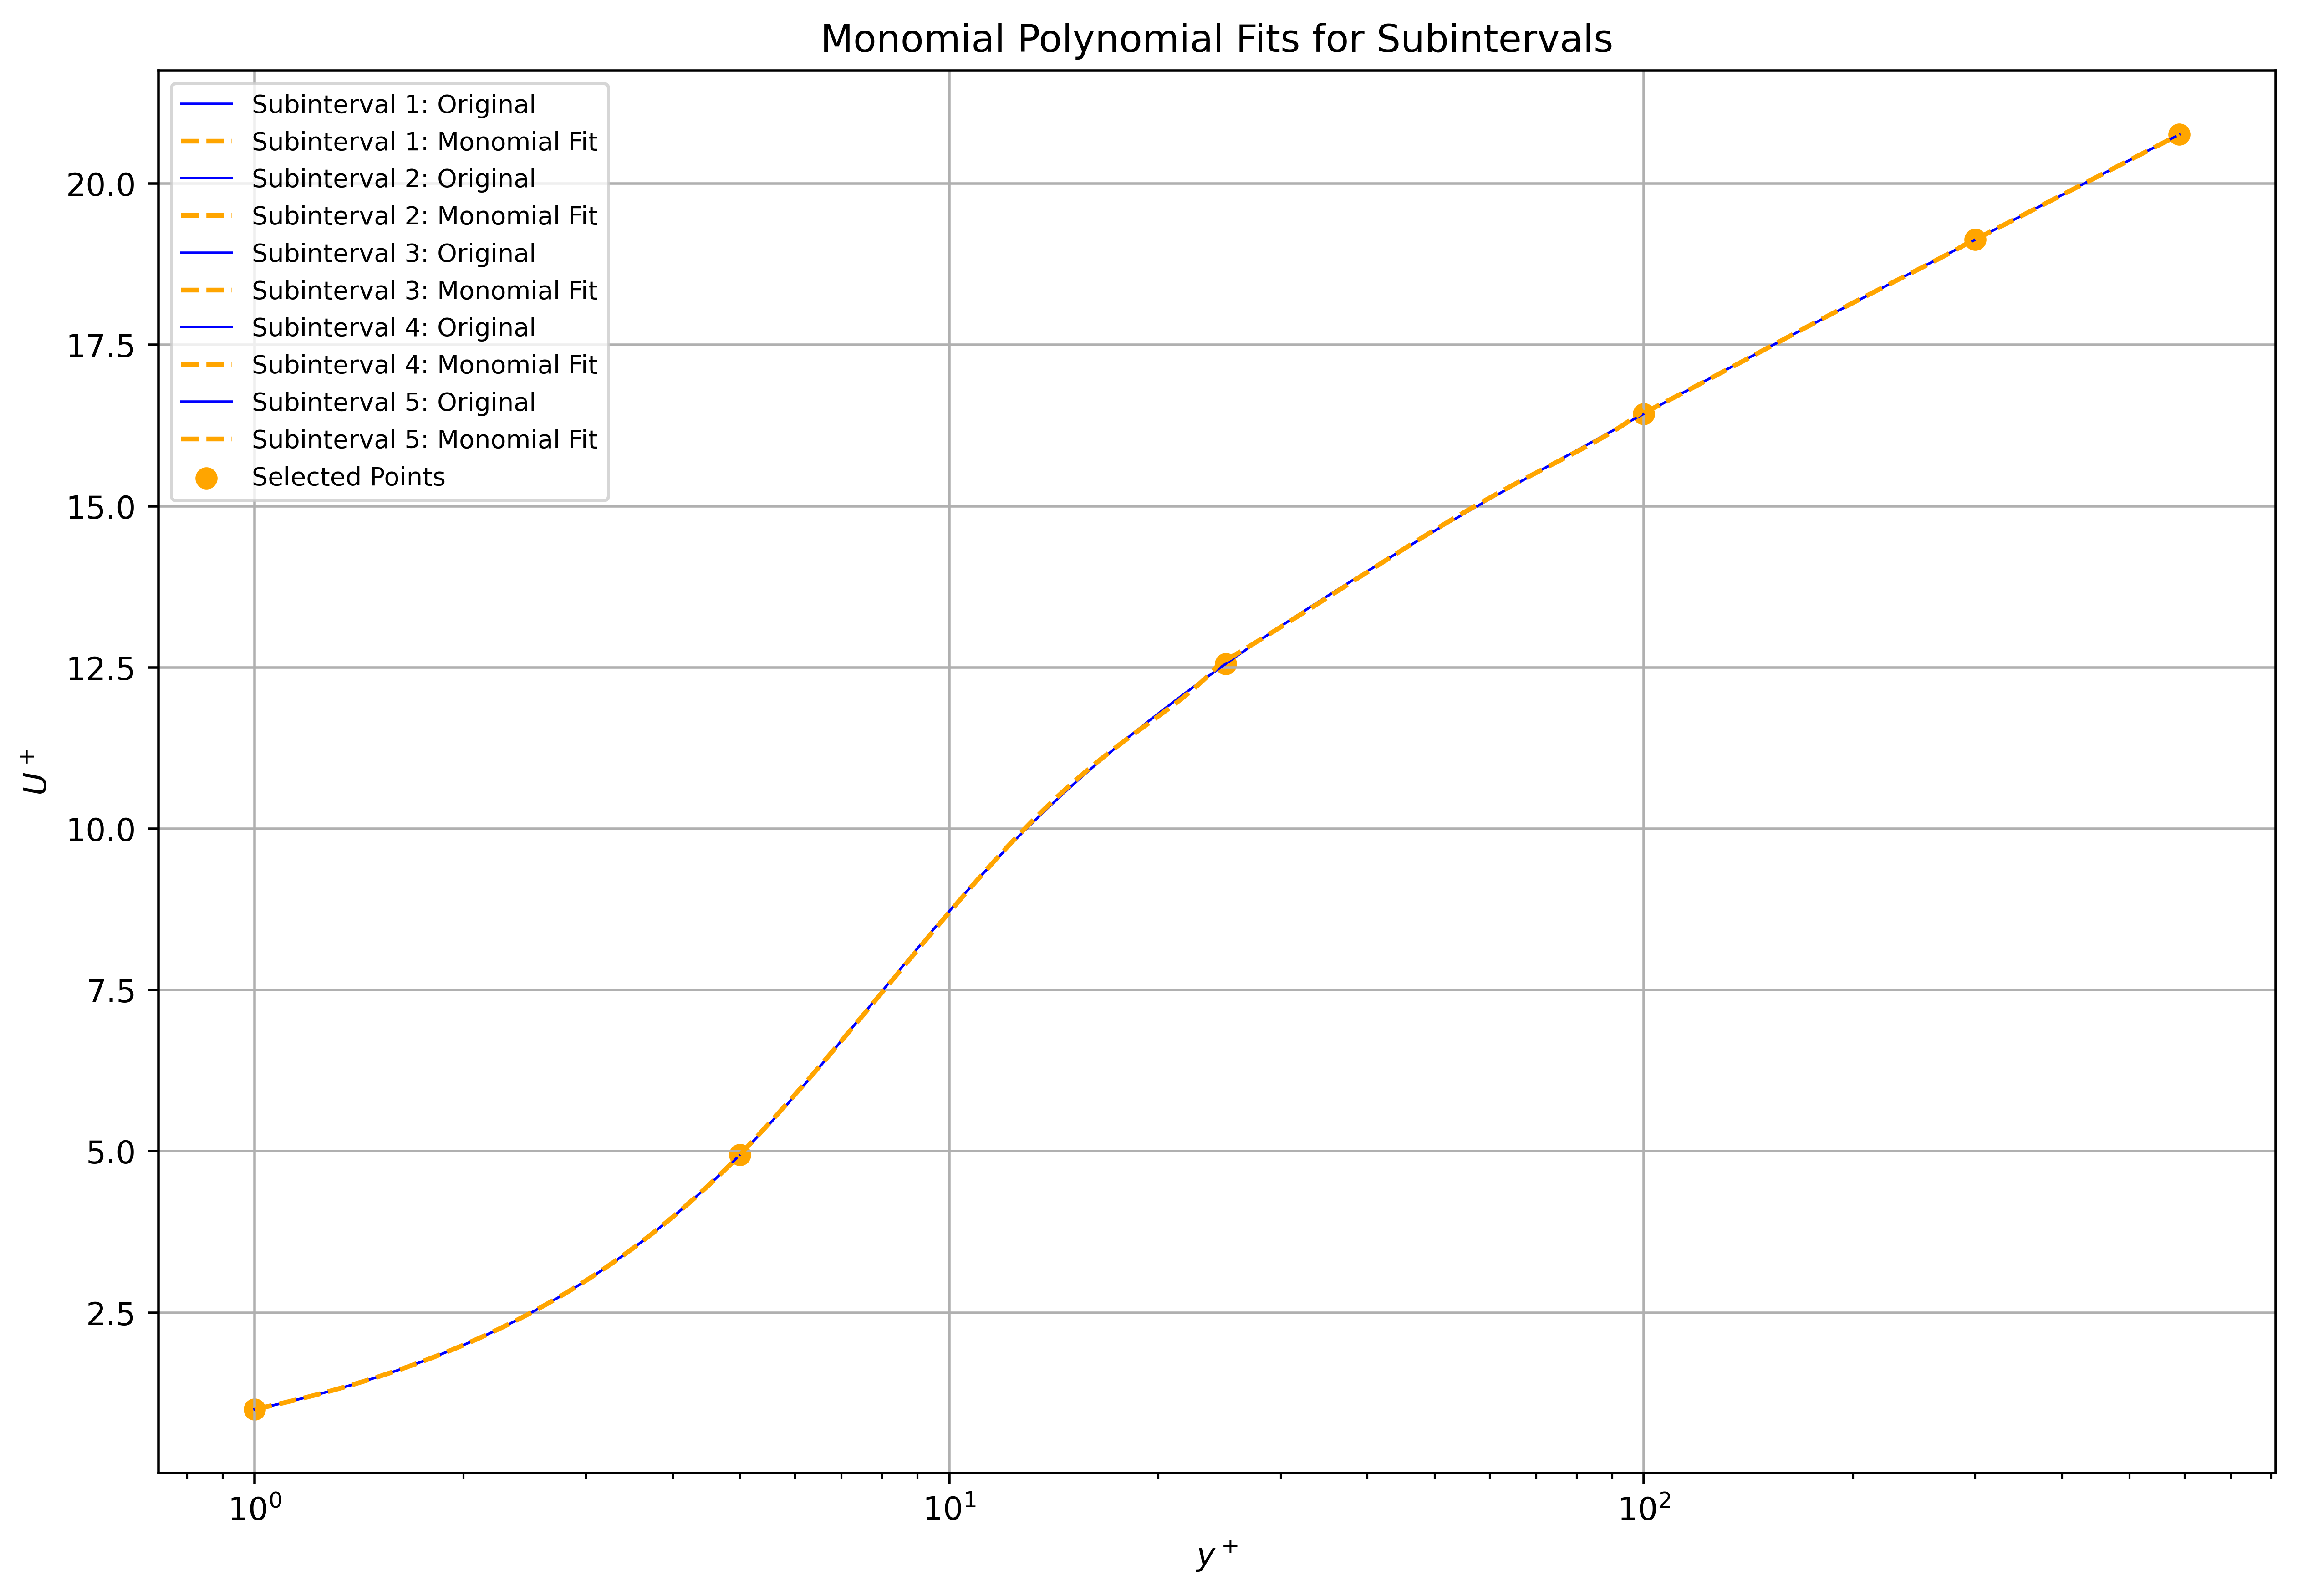

In [309]:
subintervals = [1, 5, 25,100,300, 590]
U_plus_solution=from_y_get_U(subintervals)
plt.figure(figsize=(12, 8),dpi=500)
for i in range(len(subintervals) - 1):
    a, b = U_plus_solution[i], U_plus_solution[i + 1]
    U_data=np.linspace(a,b,int(b-a)*1000)
    y_data=f(U_data)
    monomial_coeffs = np.polyfit(y_data, U_data, 3)
    U_monomial_fit = np.polyval(monomial_coeffs, y_data)
    plt.plot(y_data, U_data, label=f"Subinterval {i+1}: Original",color="blue",linewidth=0.8)
    plt.plot(y_data, U_monomial_fit, "--", label=f"Subinterval {i+1}: Monomial Fit", linewidth=1.5, color="orange")
plt.scatter(subintervals,U_plus_solution,color="orange", label="Selected Points")
plt.xlabel(r"$y^+$")
plt.ylabel(r"$U^+$")
plt.title("Monomial Polynomial Fits for Subintervals")
plt.legend(fontsize=8, loc="upper left")
plt.xscale('log')
plt.grid(True)
plt.show()

## (e)

C:\Users\David\AppData\Local\Temp\ipykernel_32200\279020459.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U_plus_solution[i] = fsolve(equation, initial_guess, args=(Y_plus))


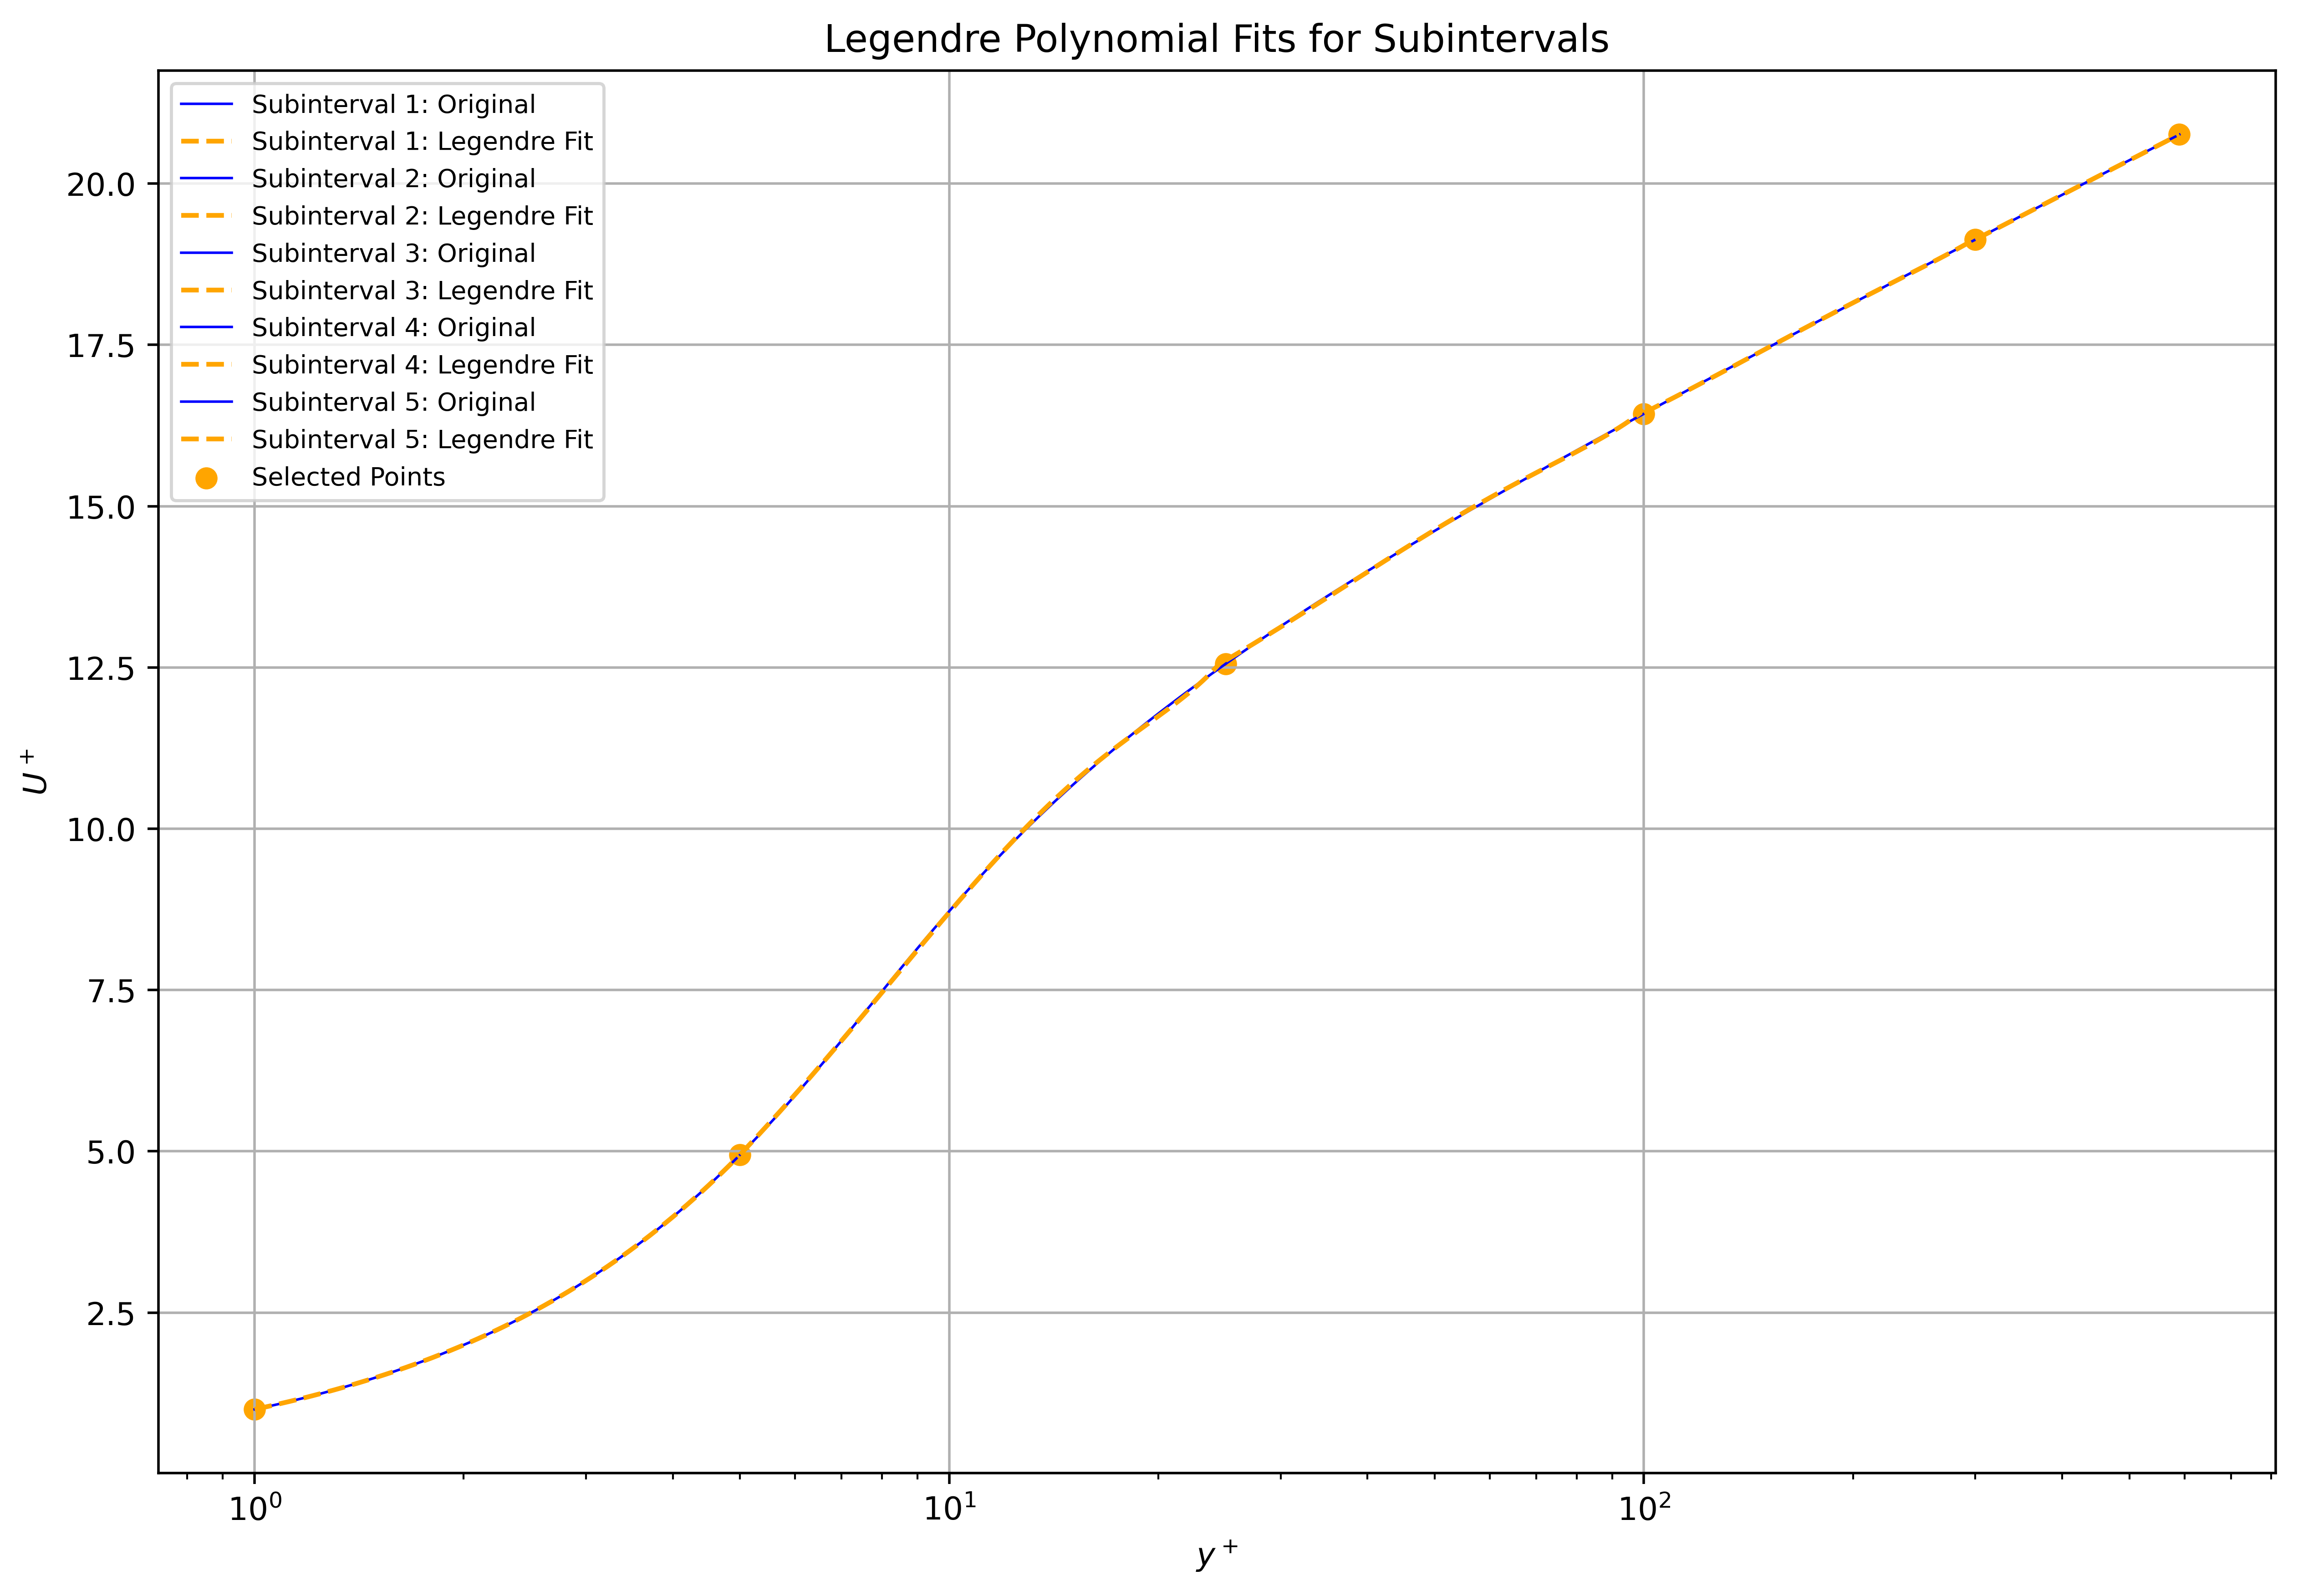

In [310]:
U_plus_solution=from_y_get_U(subintervals)
plt.figure(figsize=(12, 8),dpi=500)
for i in range(len(subintervals) - 1):
    a, b = U_plus_solution[i], U_plus_solution[i + 1]
    U_data=np.linspace(a,b,int(b-a)*1000)
    y_data=f(U_data)
    y_scaled = 2 * (y_data - subintervals[i]) / (subintervals[i+1] - subintervals[i]) - 1
    legendre_coeffs = Legendre.fit(y_scaled, U_data, 3).convert().coef
    U_legendre_fit = Legendre(legendre_coeffs)(y_scaled)

    plt.plot(y_data, U_data, label=f"Subinterval {i+1}: Original",color="blue",linewidth=0.8)
    plt.plot(y_data, U_legendre_fit, "--", label=f"Subinterval {i+1}: Legendre Fit", linewidth=1.5, color="orange")
plt.scatter(subintervals,U_plus_solution,color="orange", label="Selected Points")
plt.xlabel(r"$y^+$")
plt.ylabel(r"$U^+$")
plt.title("Legendre Polynomial Fits for Subintervals")
plt.legend(fontsize=8, loc="upper left")
plt.xscale('log')
plt.grid(True)
plt.show()